In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [9]:
path=r"E:\CodingClub_Recruitment\MLTask\Dataset.csv"
df=pd.read_csv(path)
print("Shape of dataset:", df.shape)
df.head()
# 3. Data Overview
df.info()
df.describe(include='all')


Shape of dataset: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  i

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
count,649,649,649,599,649,649.000000,576.000000,649,649,649,...,649.000000,649.000000,580.000000,649.000000,614.000000,649.000000,611.000000,603.000000,610.000000,649
unique,2,2,2,2,2,NaN,NaN,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,U,GT3,T,NaN,NaN,other,other,course,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,423,383,452,424,569,NaN,NaN,258,367,285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410
mean,NaN,NaN,NaN,NaN,NaN,2.514638,2.303819,NaN,NaN,NaN,...,1.502311,3.536210,3.746552,11.399076,11.586319,11.906009,16.747954,1.913765,2.262295,NaN
std,NaN,NaN,NaN,NaN,NaN,1.134552,1.111076,NaN,NaN,NaN,...,0.924834,1.446259,4.732890,2.745265,2.927878,3.230656,1.216812,0.830798,1.285279,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,...,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,...,2.000000,5.000000,6.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000,NaN


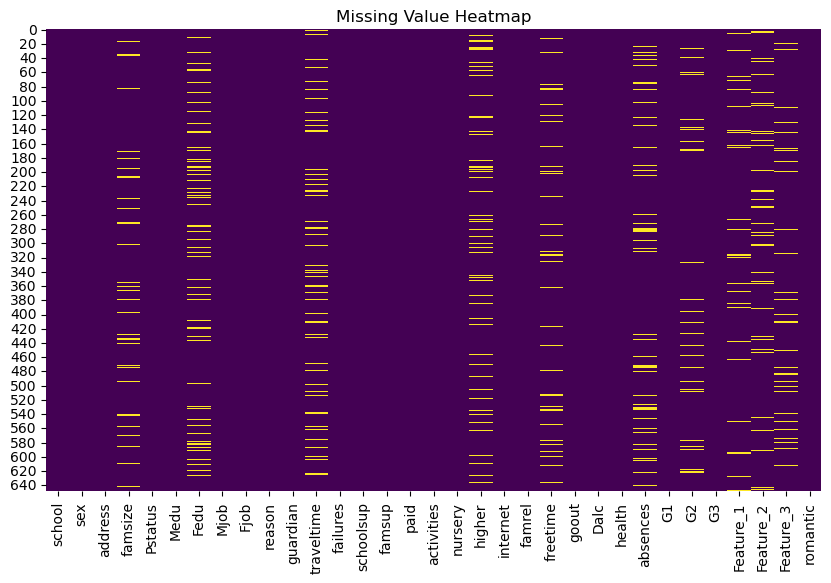

In [11]:
# 4. Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


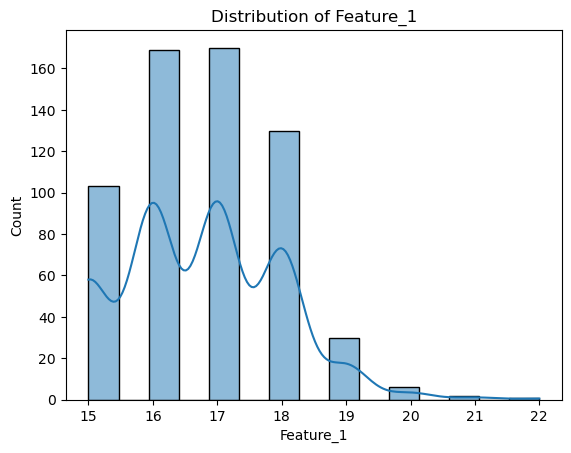

In [12]:
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')
plt.show()


The range of the Feature_1 could suggest it is age. Need more correlation details.

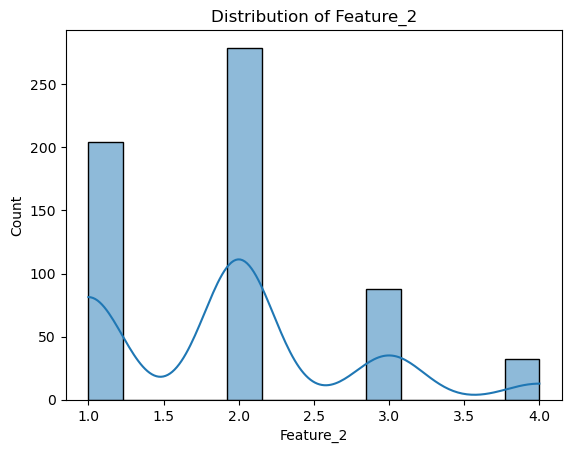

In [13]:
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')
plt.show()

The whole number values between 1 and 4 could suggest it may be number of study hours in a day

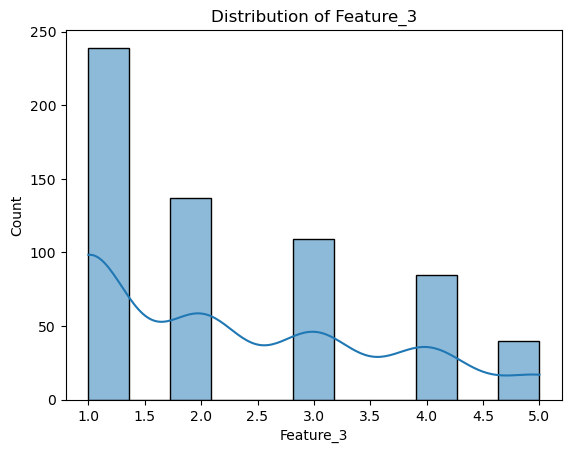

In [14]:
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')
plt.show()

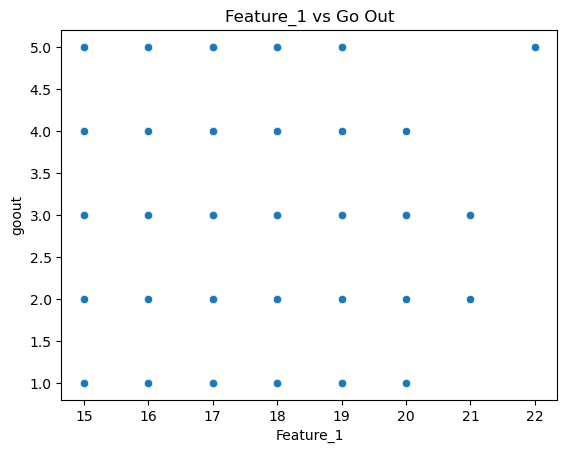

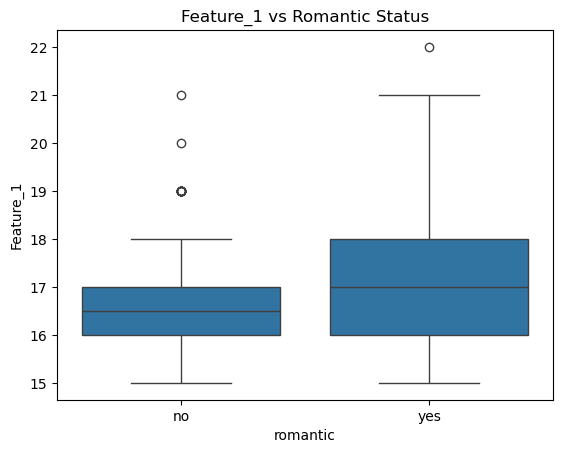

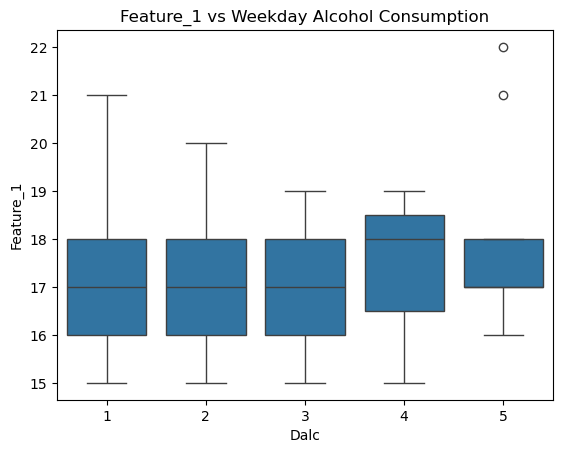

Feature_1     1.000000
failures      0.312151
Dalc          0.168583
absences      0.119640
Feature_3     0.097160
goout         0.089430
traveltime    0.045970
Feature_2     0.014528
health       -0.007759
freetime     -0.026015
famrel       -0.040149
G3           -0.105610
Medu         -0.111327
G2           -0.118624
Fedu         -0.138840
G1           -0.181571
Name: Feature_1, dtype: float64


In [17]:
sns.scatterplot(x='Feature_1', y='goout', data=df)
plt.title('Feature_1 vs Go Out')
plt.show()

sns.boxplot(x='romantic', y='Feature_1', data=df)
plt.title("Feature_1 vs Romantic Status")
plt.show()

sns.boxplot(x='Dalc', y='Feature_1', data=df)
plt.title("Feature_1 vs Weekday Alcohol Consumption")
plt.show()

correlations = df.corr(numeric_only=True)['Feature_1'].sort_values(ascending=False)
print(correlations)


Feature_1 is showing weak correlation with other factors showing it could be an independent factor. Therefore it has high of chance of being age.

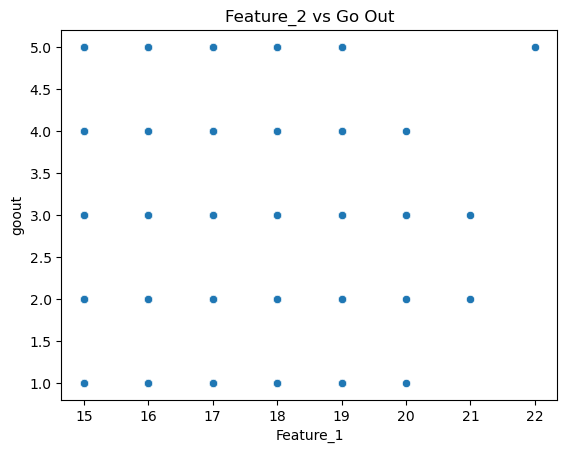

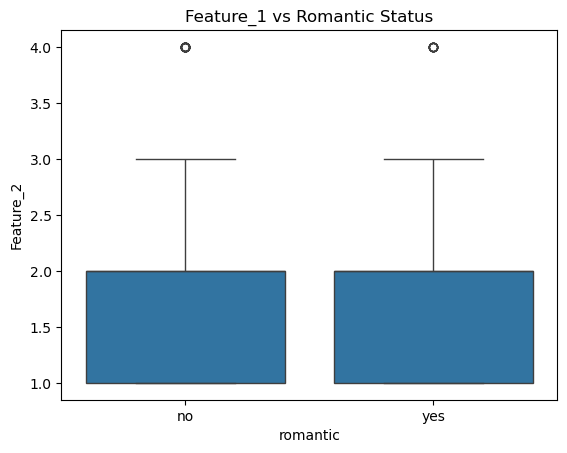

KeyError: "['Grades'] not in index"

In [ ]:
sns.scatterplot(x='Feature_1', y='goout', data=df)
plt.title('Feature_2 vs Go Out')
plt.show()

sns.boxplot(x='romantic', y='Feature_2', data=df)
plt.title("Feature_1 vs Romantic Status")
plt.show()

sns.lmplot(x='Feature_2', y='Grades', data=df)
plt.title('Feature_2 vs G3')
plt.show()

correlations = df.corr(numeric_only=True)['Feature_1'].sort_values(ascending=False)
print(correlations)